# 3. Time Series

Time series are possibly the simplest matplotlib visualizations. Although time series are expressive and intuitive visualizations to follow, extracting meaning from them requires interpretation. Multiplex's time series make it easier to highlight the story you want to convey through the plot.

At its most basic, Multiplex's time series performs the exact same function as matplotlib's `plot`: the `TimeSeries` class passes on all arguments and keyword arguments to the `plot` function. This notebook follows a simple running example: Leicester City FC footballer Jamie Vardy's record-breaking goalscoring run in the 2015/2016 season of the English Premier League.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

First, we read the data from the data files. The Premier League season is split into 38 matches, or matchdays. The file contains data about three players: Leicester FC's Jamie Vardy, Tottenham Hotspur's Harry Kane, and Manchester City's Sergio Agüero. The data contains the cumulative number of goals over these matchdays for each player.

In [2]:
df = pd.read_csv('data/top_scorers.csv')
df.index = df['Matchday']
df.drop('Matchday', axis=1, inplace=True)
df.head()

,Kane,Vardy,Aguero
Matchday,,,
1,0,1,0
2,0,1,1
3,0,1,1
4,0,2,1
5,0,3,1


Next, we plot the time series. Plotting it is very similar to how you would plot any other time series in matplotlib. The difference is that all calls are made on the `Drawable` through the `draw_time_series` method.

Multiple's time series offers more functionality. For example, it does not favor legends. Instead, line labels are drawn at the end of the time series. That way, you can read the plot as you read the data, rather than keep switching between reading the data and interpreting it with the legend.

Labels can be styled by passing on the `label_style` dictionary. Any parameter accepted by matplotlib's Text can also be passed. Multiplex uses color association to make it easier to read the time series—by default, the label will use the same color as the time series plot.

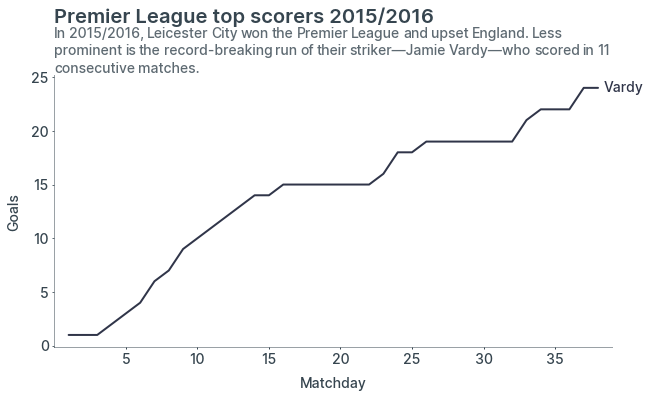

In [3]:
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "fire.style"))

viz = drawable.Drawable(plt.figure(figsize=(10, 5)))

"""
Instead of adding a legend, add a text at the end of the time series.
"""
viz.draw_time_series(df.index.to_list(), df.Vardy.to_list(),
                     color='#303549', linewidth=2,
                     label='Vardy', label_style={ 'fontweight': '500' })

viz.set_xlim(0, 39)
viz.set_xticks(range(5, 38, 5))
viz.set_xlabel('Matchday')
viz.set_ylabel('Goals')

viz.set_title('Premier League top scorers 2015/2016', loc='left')
viz.set_caption('In 2015/2016, Leicester City won the Premier League and upset England. Less prominent is the record-breaking run of their striker—Jamie Vardy—who scored in 11 consecutive matches.')
plt.show()